## Penanganan Missing Value

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
NO2 = pd.read_csv('no2_banyuwangi_data.csv')
NO2 = NO2.sort_values(by='date')
NO2

,date,feature_index,NO2
126,2024-12-31T00:00:00.000Z,0,NaN
123,2025-01-01T00:00:00.000Z,0,NaN
121,2025-01-02T00:00:00.000Z,0,NaN
124,2025-01-03T00:00:00.000Z,0,NaN
120,2025-01-04T00:00:00.000Z,0,NaN
...,...,...,...
65,2025-09-26T00:00:00.000Z,0,NaN
59,2025-09-27T00:00:00.000Z,0,NaN
64,2025-09-28T00:00:00.000Z,0,0.000025
25,2025-09-29T00:00:00.000Z,0,NaN


Penjelasan:

- Memuat dataset NO₂ dari file CSV hasil pengambilan data satelit

- Mengurutkan data berdasarkan tanggal untuk memastikan urutan temporal yang benar

- Menampilkan dataset untuk inspeksi awal

In [ ]:
NO2.isnull().sum()

,0
date,0
feature_index,0
NO2,161


/tmp/ipython-input-800750193.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",


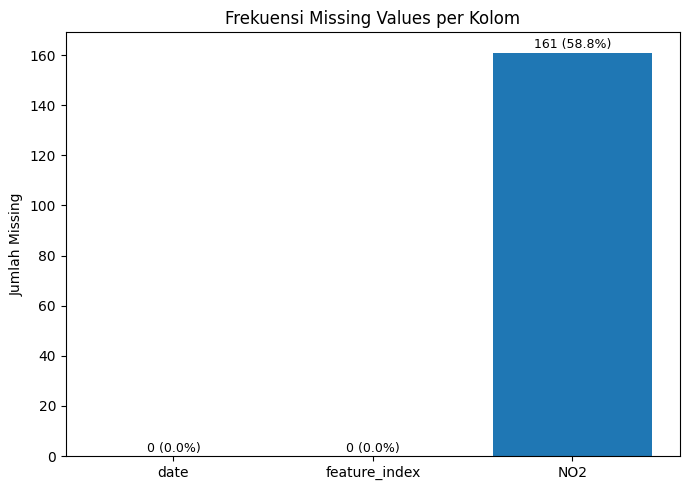

,Missing Count,Missing Percent (%)
date,0,0.00
feature_index,0,0.00
NO2,161,58.76


In [ ]:
missing_count = NO2.isnull().sum()
missing_percent = (missing_count / len(NO2)) * 100

fig, ax = plt.subplots(figsize=(7,5))

bars = ax.bar(missing_count.index, missing_count)

ax.set_title("Frekuensi Missing Values per Kolom")
ax.set_ylabel("Jumlah Missing")

for i, v in enumerate(missing_count):
    ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

Penjelasan:

- Membuat visualisasi bar chart untuk missing values

- Menampilkan jumlah dan persentase missing values di atas setiap bar

- Membuat tabel summary missing values untuk dokumentasi

In [ ]:
NO2 = pd.Series(NO2['NO2'].values, index=NO2['date'], name='NO2')
NO2 = NO2.interpolate(method='linear').bfill()
NO2 = pd.DataFrame(NO2).reset_index()
NO2

,date,NO2
0,2024-12-31T00:00:00.000Z,0.000009
1,2025-01-01T00:00:00.000Z,0.000009
2,2025-01-02T00:00:00.000Z,0.000009
3,2025-01-03T00:00:00.000Z,0.000009
4,2025-01-04T00:00:00.000Z,0.000009
...,...,...
269,2025-09-26T00:00:00.000Z,0.000026
270,2025-09-27T00:00:00.000Z,0.000026
271,2025-09-28T00:00:00.000Z,0.000025
272,2025-09-29T00:00:00.000Z,0.000024


Penjelasan:

- Konversi ke Series: Mengubah data menjadi pandas Series dengan index tanggal

- Linear Interpolation: Mengisi missing values dengan interpolasi linear berdasarkan nilai sebelum dan sesudahnya

- Backward Fill: Mengisi missing values yang tersisa dengan nilai valid berikutnya

- Konversi kembali: Mengubah kembali ke DataFrame dan reset index

- Metode ini mempertahankan pola temporal data

In [ ]:
NO2.isnull().sum()

,0
date,0
NO2,0


Penjelasan: Memverifikasi bahwa semua missing values telah berhasil ditangani setelah proses interpolasi dan backward fill.

In [ ]:
missing_count = NO2.isnull().sum()
missing_percent = (missing_count / len(NO2)) * 100

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

,Missing Count,Missing Percent (%)
date,0,0.0
NO2,0,0.0


Penjelasan: Membuat tabel summary untuk mendokumentasikan bahwa tidak ada lagi missing values setelah proses imputasi.


In [ ]:
NO2 = NO2.drop(columns='date')
NO2 = pd.DataFrame(NO2)
NO2

,NO2
0,0.000009
1,0.000009
2,0.000009
3,0.000009
4,0.000009
...,...
269,0.000026
270,0.000026
271,0.000025
272,0.000024


Penjelasan:

- Menghapus kolom ‘date’ karena tidak diperlukan untuk modeling time series

- Memastikan data dalam format DataFrame yang bersih

- Memfokuskan data hanya pada nilai NO₂ untuk proses supervised learning



### Membentuk data supervised


In [ ]:
day1 = NO2
day2 = NO2
day3 = NO2
day4 = NO2
day5 = NO2

Penjelasan: Membuat 5 copy dari dataset untuk membuat variasi lag features (1-5 hari). Setiap dataset akan digunakan untuk eksperimen dengan jumlah lag yang berbeda.



### Membuat data supervised menggunakan t1

In [ ]:
n_lags = 1
for i in range(1, n_lags + 1):
    day1[f't-{i}'] = day1['NO2'].shift(i)

day1 = day1.dropna().reset_index(drop=True)
day1.to_csv('day1_supervised.csv', index=False)
day1

,NO2,t-1
0,0.000009,0.000009
1,0.000009,0.000009
2,0.000009,0.000009
3,0.000009,0.000009
4,0.000009,0.000009
...,...,...
267,0.000026,0.000026
268,0.000026,0.000026
269,0.000025,0.000026
270,0.000024,0.000025


### Membuat data supervised menggunakan t1, t2


In [ ]:
n_lags = 2
for i in range(1, n_lags + 1):
    day2[f't-{i}'] = day2['NO2'].shift(i)

day2 = day2.dropna().reset_index(drop=True)
day2.to_csv('day2_supervised.csv', index=False)
day2

,NO2,t-1,t-2
0,0.000009,0.000009,0.000009
1,0.000009,0.000009,0.000009
2,0.000009,0.000009,0.000009
3,0.000009,0.000009,0.000009
4,0.000009,0.000009,0.000009
...,...,...,...
267,0.000026,0.000026,0.000012
268,0.000026,0.000026,0.000026
269,0.000025,0.000026,0.000026
270,0.000024,0.000025,0.000026


### Membuat data supervised menggunakan t1, t2, t3

In [ ]:
n_lags = 3
for i in range(1, n_lags + 1):
    day3[f't-{i}'] = day3['NO2'].shift(i)

day3 = day3.dropna().reset_index(drop=True)
day3.to_csv('day3_supervised.csv', index=False)
day3

,NO2,t-1,t-2,t-3
0,0.000009,0.000009,0.000009,0.000009
1,0.000009,0.000009,0.000009,0.000009
2,0.000009,0.000009,0.000009,0.000009
3,0.000009,0.000009,0.000009,0.000009
4,0.000009,0.000009,0.000009,0.000009
...,...,...,...,...
266,0.000026,0.000026,0.000012,0.000014
267,0.000026,0.000026,0.000026,0.000012
268,0.000025,0.000026,0.000026,0.000026
269,0.000024,0.000025,0.000026,0.000026


### Membuat data supervised menggunakan t1, t2, t3, t4

In [ ]:
n_lags = 4
for i in range(1, n_lags + 1):
    day4[f't-{i}'] = day4['NO2'].shift(i)

day4 = day4.dropna().reset_index(drop=True)
day4.to_csv('day4_supervised.csv', index=False)
day4

,NO2,t-1,t-2,t-3,t-4
0,0.000009,0.000009,0.000009,0.000009,0.000009
1,0.000009,0.000009,0.000009,0.000009,0.000009
2,0.000009,0.000009,0.000009,0.000009,0.000009
3,0.000009,0.000009,0.000009,0.000009,0.000009
4,0.000009,0.000009,0.000009,0.000009,0.000009
...,...,...,...,...,...
265,0.000026,0.000026,0.000012,0.000014,0.000004
266,0.000026,0.000026,0.000026,0.000012,0.000014
267,0.000025,0.000026,0.000026,0.000026,0.000012
268,0.000024,0.000025,0.000026,0.000026,0.000026


### Membuat data supervised menggunakan t1, t2, t3, t4, t5

In [ ]:
n_lags = 5
for i in range(1, n_lags + 1):
    day5[f't-{i}'] = day5['NO2'].shift(i)

day5 = day5.dropna().reset_index(drop=True)
day5.to_csv('day5_supervised.csv', index=False)
day5

,NO2,t-1,t-2,t-3,t-4,t-5
0,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
1,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
2,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
3,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
4,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
...,...,...,...,...,...,...
264,0.000026,0.000026,0.000012,0.000014,0.000004,0.000010
265,0.000026,0.000026,0.000026,0.000012,0.000014,0.000004
266,0.000025,0.000026,0.000026,0.000026,0.000012,0.000014
267,0.000024,0.000025,0.000026,0.000026,0.000026,0.000012
